# Perform RANSAC to determine fundamental/essential matrix for 2 images

https://www.cc.gatech.edu/~hays/compvision/proj3/

* Camera projection Matrix: maps 3d world coordinates to image coordinate
** 3x4 matrix
* Fundamental Matrix: relates points in one scene to epipolar lines in another



In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

## Before we can start finding the matrix, have to find and match points between the images

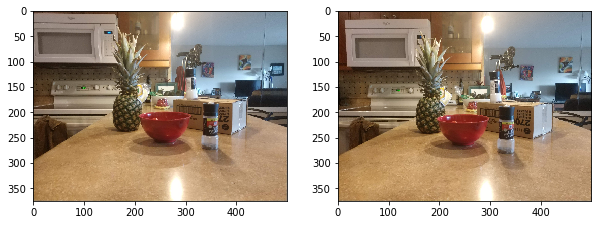

Found 121 matches from 1000


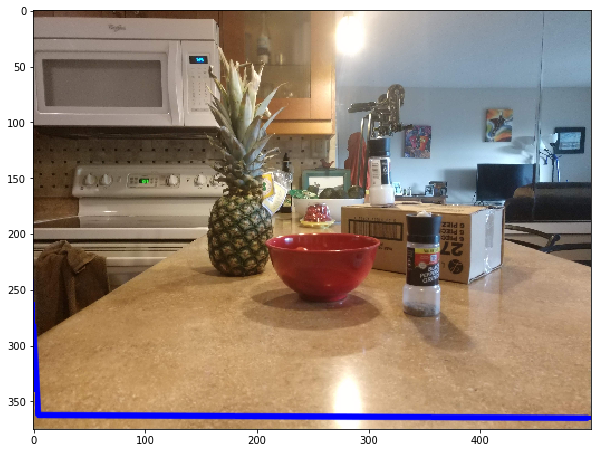

In [2]:
# load images
scale = .125
image_left = cv2.imread("images/pineapple_left.jpg")
image_right = cv2.imread("images/pineapple_right.jpg")
image_left = cv2.resize(image_left,(0,0),fx=scale,fy=scale)
image_right = cv2.resize(image_right,(0,0),fx=scale,fy=scale)
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(image_left[:,:,::-1])
plt.subplot(1,2,2)
plt.imshow(image_right[:,:,::-1])
plt.show()

# Compute keypoints and descriptors
left_gray = cv2.cvtColor(image_left,cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(image_right,cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(nfeatures=1000)
kps1, descs1 = orb.detectAndCompute(left_gray,None)
kps2, descs2 = orb.detectAndCompute(right_gray,None)
left_with_kps = image_left.copy()
right_with_kps = image_right.copy()
#plt.subplot(1,2,1)
#plt.imshow(cv2.drawKeypoints(left_with_kps,kps1,left_with_kps,cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)[:,:,::-1])
#plt.subplot(1,2,2)
#plt.imshow(cv2.drawKeypoints(right_with_kps,kps2,right_with_kps,cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)[:,:,::-1])
#plt.show()

# Match descriptors
MIN_MATCH_COUNT = 10
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                  table_number =12, # 12
                  key_size = 10,     # 20
                  multi_probe_level = 2) #2
search_params = {"checks":100}
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(descs1, descs2, k=2) # query is descs1 which is left image
good_matches = [m for m,n in matches if m.distance<0.7*n.distance]# keep good matches
print(f"Found {len(good_matches)} matches from {len(matches)}")    
#img3 = cv2.drawMatches(image_left,kps1, image_right,kps2, good[:20],None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#plt.imshow(img3[:,:,::-1])
#plt.show()

# compute homography between images
if len(matches) > MIN_MATCH_COUNT:
    src_points = np.float32([ kps2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)
    dst_points = np.float32([ kps1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = image_right.shape
    pts = np.float32([ [0,0], [0,h-1], [w-1,h-1], [w-1,0]]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    imgOut = image_left.copy()
    imgOut = cv2.polylines(imgOut, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
    plt.imshow(imgOut[:,:,::-1])
else:
    print("Not enough matches found")    

In [3]:
m = good_matches[0]

In [4]:
height, width = image_left.shape[:2]
cx = 0
cy = 0 
f = np.array([[width/2, 0, cx],
             [0, height/2, cy],
            [0,0,1]],dtype=np.float32)

In [5]:
point = np.array([[0,0,0]],dtype=np.float32).T

In [89]:
# Data taken from: https://www.cc.gatech.edu/~hays/compvision/proj3/
# 
pts2d_norm_a = np.array([[1.0486,-0.3645],
                            [-1.6851,-0.4004],
                            [-0.9437,-0.4200],
                            [1.0682, 0.0699],
                            [0.6077,-0.0771],
                            [1.2543,-0.6454],
                            [-0.2709, 0.8635],
                            [-0.4571,-0.3645],
                            [-0.7902, 0.0307],
                            [0.7318, 0.6382],
                            [-1.0580, 0.3312],
                            [0.3464, 0.3377],
                            [0.3137, 0.1189],
                            [-0.4310, 0.0242],
                            [-0.4799, 0.2920],
                            [0.6109, 0.0830],
                            [-0.4081, 0.2920],
                            [-0.1109,-0.2992],
                            [0.5129,-0.0575],
                            [0.1406,-0.4527]],dtype=np.float32)
pts3d_norm = np.array([[1.5706,-0.1490, 0.2598],
                        [-1.5282, 0.9695, 0.3802],
                        [-0.6821, 1.2856, 0.4078],
                        [0.4124,-1.0201,-0.0915],
                        [1.2095, 0.2812,-0.1280],
                        [0.8819,-0.8481, 0.5255],
                        [-0.9442,-1.1583,-0.3759],
                        [0.0415, 1.3445, 0.3240],
                        [-0.7975, 0.3017,-0.0826],
                        [-0.4329,-1.4151,-0.2774],
                        [-1.1475,-0.0772,-0.2667],
                        [-0.5149,-1.1784,-0.1401],
                        [0.1993,-0.2854,-0.2114],
                        [-0.4320, 0.2143,-0.1053],
                        [-0.7481,-0.3840,-0.2408],
                        [0.8078,-0.1196,-0.2631],
                        [-0.7605,-0.5792,-0.1936],
                        [0.3237, 0.7970, 0.2170],
                        [1.3089, 0.5786,-0.1887],
                        [1.2323, 1.4421, 0.4506]],dtype=np.float32)

M_norm_A_correct = np.array([[-.4583, .2947, .0139, -.0040],
                            [.0509, .0546, .541, .0524],
                            [-.1090, -.1784, .0443, -.5968]],dtype=np.float32)
pt3d_norm_test = np.array([[1.2323,1.4421,0.4506,1.0]],dtype=np.float32).T
pt2d_norm_test_correct = np.array([[0.1419,-0.4518]],dtype=np.float32).T

def test_projection(pt3d, m, correct):
    assert len(pt3d.shape) == 2, "Invalid orientation, pt3d must be 3 or 4 by nPoints"
    assert pt3d.shape[0] >= 3, "Invalid shape, pt3d must have 3 or 4 columns"
        
    rst = np.matmul(m,pt3d)    
    rst = rst[:2,:] / rst[2,:]
    
    assert np.allclose(rst, correct,rtol=1e-4,atol=1e-4)

test_projection(pt3d_norm_test, M_norm_A_correct, pt2d_norm_test_correct)

In [73]:
pts3d = np.hstack((pts3d_norm,np.ones((pts3d_norm.shape[0],1)).astype(np.float32)))
rst = np.matmul(M_norm_A_correct,pts3d.T)    
rst = rst[:2,:] / rst[2,:]
rst.T

array([[ 1.0468559 , -0.36273223],
       [-1.6839494 , -0.397784  ],
       [-0.94467294, -0.42044336],
       [ 1.0670067 ,  0.068578  ],
       [ 0.6083371 , -0.0765726 ],
       [ 1.2555413 , -0.64682215],
       [-0.27032733,  0.8630147 ],
       [-0.4568154 , -0.36670944],
       [-0.7918447 ,  0.02891757],
       [ 0.7319067 ,  0.6365265 ],
       [-1.054658  ,  0.3289041 ],
       [ 0.34825838,  0.33845595],
       [ 0.3161065 ,  0.11682667],
       [-0.4314423 ,  0.02506771],
       [-0.4860802 ,  0.2993262 ],
       [ 0.61187345,  0.08197983],
       [-0.40833774,  0.29266512],
       [-0.11186806, -0.30051398],
       [ 0.5122817 , -0.05702104],
       [ 0.14199579, -0.45190403]], dtype=float32)

In [123]:
def calculate_projection_matrix(points_2d, points_3d):
    """
    To solve for the projection matrix. You need to set up a system of
    equations using the corresponding 2D and 3D points:
    
    A*x = b: 
                                                      [ M11      [ u1
                                                        M12        v1
                                                        M13        .
                                                        M14        .
    [ X1 Y1 Z1 1 0  0  0  0 -u1*X1 -u1*Y1 -u1*Z1        M21        .
      0  0  0  0 X1 Y1 Z1 1 -v1*X1 -v1*Y1 -v1*Z1        M22        .
      .  .  .  . .  .  .  .    .     .      .       *   M23   =    .
      Xn Yn Zn 1 0  0  0  0 -un*Xn -un*Yn -un*Zn        M24        .
      0  0  0  0 Xn Yn Zn 1 -vn*Xn -vn*Yn -vn*Zn ]      M31        .
                                                        M32        un
                                                        M33 ]      vn ]

    Then you can solve this using least squares with np.linalg.lstsq() or SVD.
    Notice you obtain 2 equations for each corresponding 2D and 3D point
    pair. To solve this, you need at least 6 point pairs.

    Args:
    -   points_2d: A numpy array of shape (N, 2)
    -   points_3d: A numpy array of shape (N, 3)

    Returns:
    -   M: A numpy array of shape (3, 4) representing the projection matrix
    """
    # Placeholder M matrix. It leads to a high residual. Your total residual
    # should be less than 1.
    M = np.asarray([[0.1768, 0.7018, 0.7948, 0.4613],
                    [0.6750, 0.3152, 0.1136, 0.0480],
                    [0.1020, 0.1725, 0.7244, 0.9932]])

    ###########################################################################
    # TODO: YOUR PROJECTION MATRIX CALCULATION CODE HERE
    ###########################################################################
    
    if points_3d.shape[1] == 3:
        points_3d = np.hstack( (points_3d, 
                                np.ones((points_3d.shape[0],1),dtype=np.float32)) )
        
    A = np.zeros((2*points_3d.shape[0],12),dtype=np.float32)
    A[np.arange(0,A.shape[0],2),:4] = points_3d
    A[np.arange(1,A.shape[0],2),4:8] = points_3d
    
    
    A[np.arange(0,A.shape[0],2),8:11] = -np.broadcast_to(points_2d[:,0].reshape(-1,1),(points_2d.shape[0],3))*points_3d[:,:3]
    A[np.arange(1,A.shape[0],2),8:11] = -np.broadcast_to(points_2d[:,1].reshape(-1,1),(points_2d.shape[0],3))*points_3d[:,:3]
    A[:,11] = 1.
    
    #print(A)

    A_inverse = np.linalg.pinv(A)
    M = np.matmul(A_inverse, points_2d.reshape(-1,1))
    
    M = np.reshape(M,(3,4))
    ###########################################################################
    # END OF YOUR CODE
    ###########################################################################
    
    return M
calculate_projection_matrix(pts2d_norm_a, pts3d_norm)opencv 

array([[ 0.7678583 , -0.493848  , -0.02339786,  0.03374854],
       [-0.08521342, -0.0914682 , -0.9065233 , -0.06075266],
       [ 0.18265018,  0.29882926, -0.0741924 , -0.02700412]],
      dtype=float32)

In [114]:
np.ones((pts3d_norm.shape[0],1),dtype=np.float32)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [117]:
a = np.arange(0,10,1)#.reshape(-1,1)
np.broadcast_to(a,(a.shape[0],2))

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (10,) and requested shape (10,2)

In [103]:
a = np.random.rand(6,3)
print(a)

a[np.arange(0,a.shape[0],2),:2] = 1
print(a)

[[0.53166355 0.87569908 0.7612391 ]
 [0.29906617 0.74297859 0.65571857]
 [0.77818896 0.23633221 0.77503331]
 [0.78882651 0.28373256 0.98713909]
 [0.37205893 0.82796691 0.76175669]
 [0.24900849 0.23614218 0.51949358]]
[[1.         1.         0.7612391 ]
 [0.29906617 0.74297859 0.65571857]
 [1.         1.         0.77503331]
 [0.78882651 0.28373256 0.98713909]
 [1.         1.         0.76175669]
 [0.24900849 0.23614218 0.51949358]]


In [28]:
pts3d = np.hstack((pts3d_norm,np.ones((pts3d_norm.shape[0],1)).astype(np.float32)))
coordinates_2d_scaled = np.matmul(M_norm_A_correct,pts3d.T).T

In [32]:
coordinates_2d = coordinates_2d_scaled[:,:2]/np.expand_dims(coordinates_2d_scaled[:,2],axis=-1)
coordinates_2d

array([[ 1.0468559 , -0.36273223],
       [-1.6839494 , -0.397784  ],
       [-0.94467294, -0.42044336],
       [ 1.0670067 ,  0.068578  ],
       [ 0.6083371 , -0.0765726 ],
       [ 1.2555413 , -0.64682215],
       [-0.27032733,  0.8630147 ],
       [-0.4568154 , -0.36670944],
       [-0.7918447 ,  0.02891757],
       [ 0.7319067 ,  0.6365265 ],
       [-1.054658  ,  0.3289041 ],
       [ 0.34825838,  0.33845595],
       [ 0.3161065 ,  0.11682667],
       [-0.4314423 ,  0.02506771],
       [-0.4860802 ,  0.2993262 ],
       [ 0.61187345,  0.08197983],
       [-0.40833774,  0.29266512],
       [-0.11186806, -0.30051398],
       [ 0.5122817 , -0.05702104],
       [ 0.14199579, -0.45190403]], dtype=float32)

In [25]:
M_norm_A_correct.shape

(3, 4)